In [1]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline 

# Parte 1 do experimento

In [2]:
#Dados
m_1 = 235.38 #g
m_2 = 235.88 #g
dist = [30,25,20,15,10,5, 0] #cm
t_30 = [32.28,32.19,32.19,32.25,32.25] #s
t_25 = [27.31,27.37,27.35,27.34,27.44] #s
t_20 = [22.63,22.72,22.63,22.69,22.69] #s
t_15 = [18.16,18.19,18.16,18.18,18.15] #s
t_10 = [14.13,14.06,14.06,14.19,14.10] #s
t_5 =  [10.97,10.97,10.97,11.00,10.96] #s
t_sem_peso = [9.63,9.68,9.56,9.63,9.62] #s
t_aux = [t_30,t_25,t_20,t_15,t_10,t_5,t_sem_peso]

In [3]:
# incertezas:
inc_massa = 0.01 #g
inc_dist = 0.05 #cm
inc_cronometro = 0.01/2 #s

In [4]:
#Convertendo alguns dados para o SI:

m_1 = m_1/1000 #kg
m_2 = m_2/1000 #kg
inc_massa = inc_massa/1000 #kg


dist = np.array(dist)/100 #m
inc_dist = inc_dist/100 #m

print(dist)
print(inc_dist)

[0.3  0.25 0.2  0.15 0.1  0.05 0.  ]
0.0005


## Cálculo do período médio e sua incerteza

In [5]:
t_mean = []
inc_t_mean = []
for j in t_aux:
    #Calculando o período médio
    t_mean.append(np.mean(j)/10)
    
    #Calculando a incerteza via desvio padrão
    inc_t = np.std(j)/(np.sqrt(len(j)-1))
    #Calculando a incerteza considerando também a incerteza do cronômetro:
    ince_t = np.sqrt(np.power(inc_t,2) + np.power(inc_cronometro,2))
    #Arredondando a incerteza
    inc_t = float('{:g}'.format(float('{:.1g}'.format(inc_t))))
    inc_t_mean.append(inc_t)

print(t_mean)
print(inc_t_mean)

#for k in inc_t_mean:
    

[3.2232, 2.7362, 2.2672, 1.8168, 1.4107999999999998, 1.0974, 0.9624]
[0.02, 0.02, 0.02, 0.007, 0.02, 0.007, 0.02]


In [6]:
#Arredondando o período segundo a incerteza:
for i,k in enumerate(inc_t_mean):
    casas = str(k)[::-1].find('.')
    t_mean[i] = np.round(t_mean[i],casas)

print(t_mean)

[3.22, 2.74, 2.27, 1.817, 1.41, 1.097, 0.96]


Nós sabemos que em oscilações rotacionais, o período de um corpo com momento de inércia $I$ é dado por:

$$T = 2\pi\sqrt{\frac{I}{D}} \implies T^2 = 4\pi^2 \frac{I}{D}$$

Onde $D$ é o torque restaurador. 

Para uma barra com duas massas, $m_1$ e $m_2$, o momento de inércia é dado por:

$$I = I_{m_1} + I_{m_2} + I_0$$

Onde $I_0$ corresponde ao momento de inércia da barra sem os pesos. Utilizando a definição de momento de inércia e que as massas estão a uma distância $r$ do eixo de rotação:

$$I = m_1 r^2 + m_2 r^2 + I_0 = (m_1 + m_2)r^2 + I_0$$

Substituindo isto na expressão de T^2:

$$T^2 = 4\pi^2 \frac{((m_1 + m_2)r^2 + I_0)}{D} = 4\pi^2 \frac{(m_1 + m_2)r^2}{D} + 4\pi^2 \frac{I_0}{D}$$

Definindo $T_0^2 \equiv 4\pi^2 \frac{I_0}{D}$:

$$T^2 =  4\pi^2 \frac{(m_1 + m_2)r^2}{D} + T_0^2$$

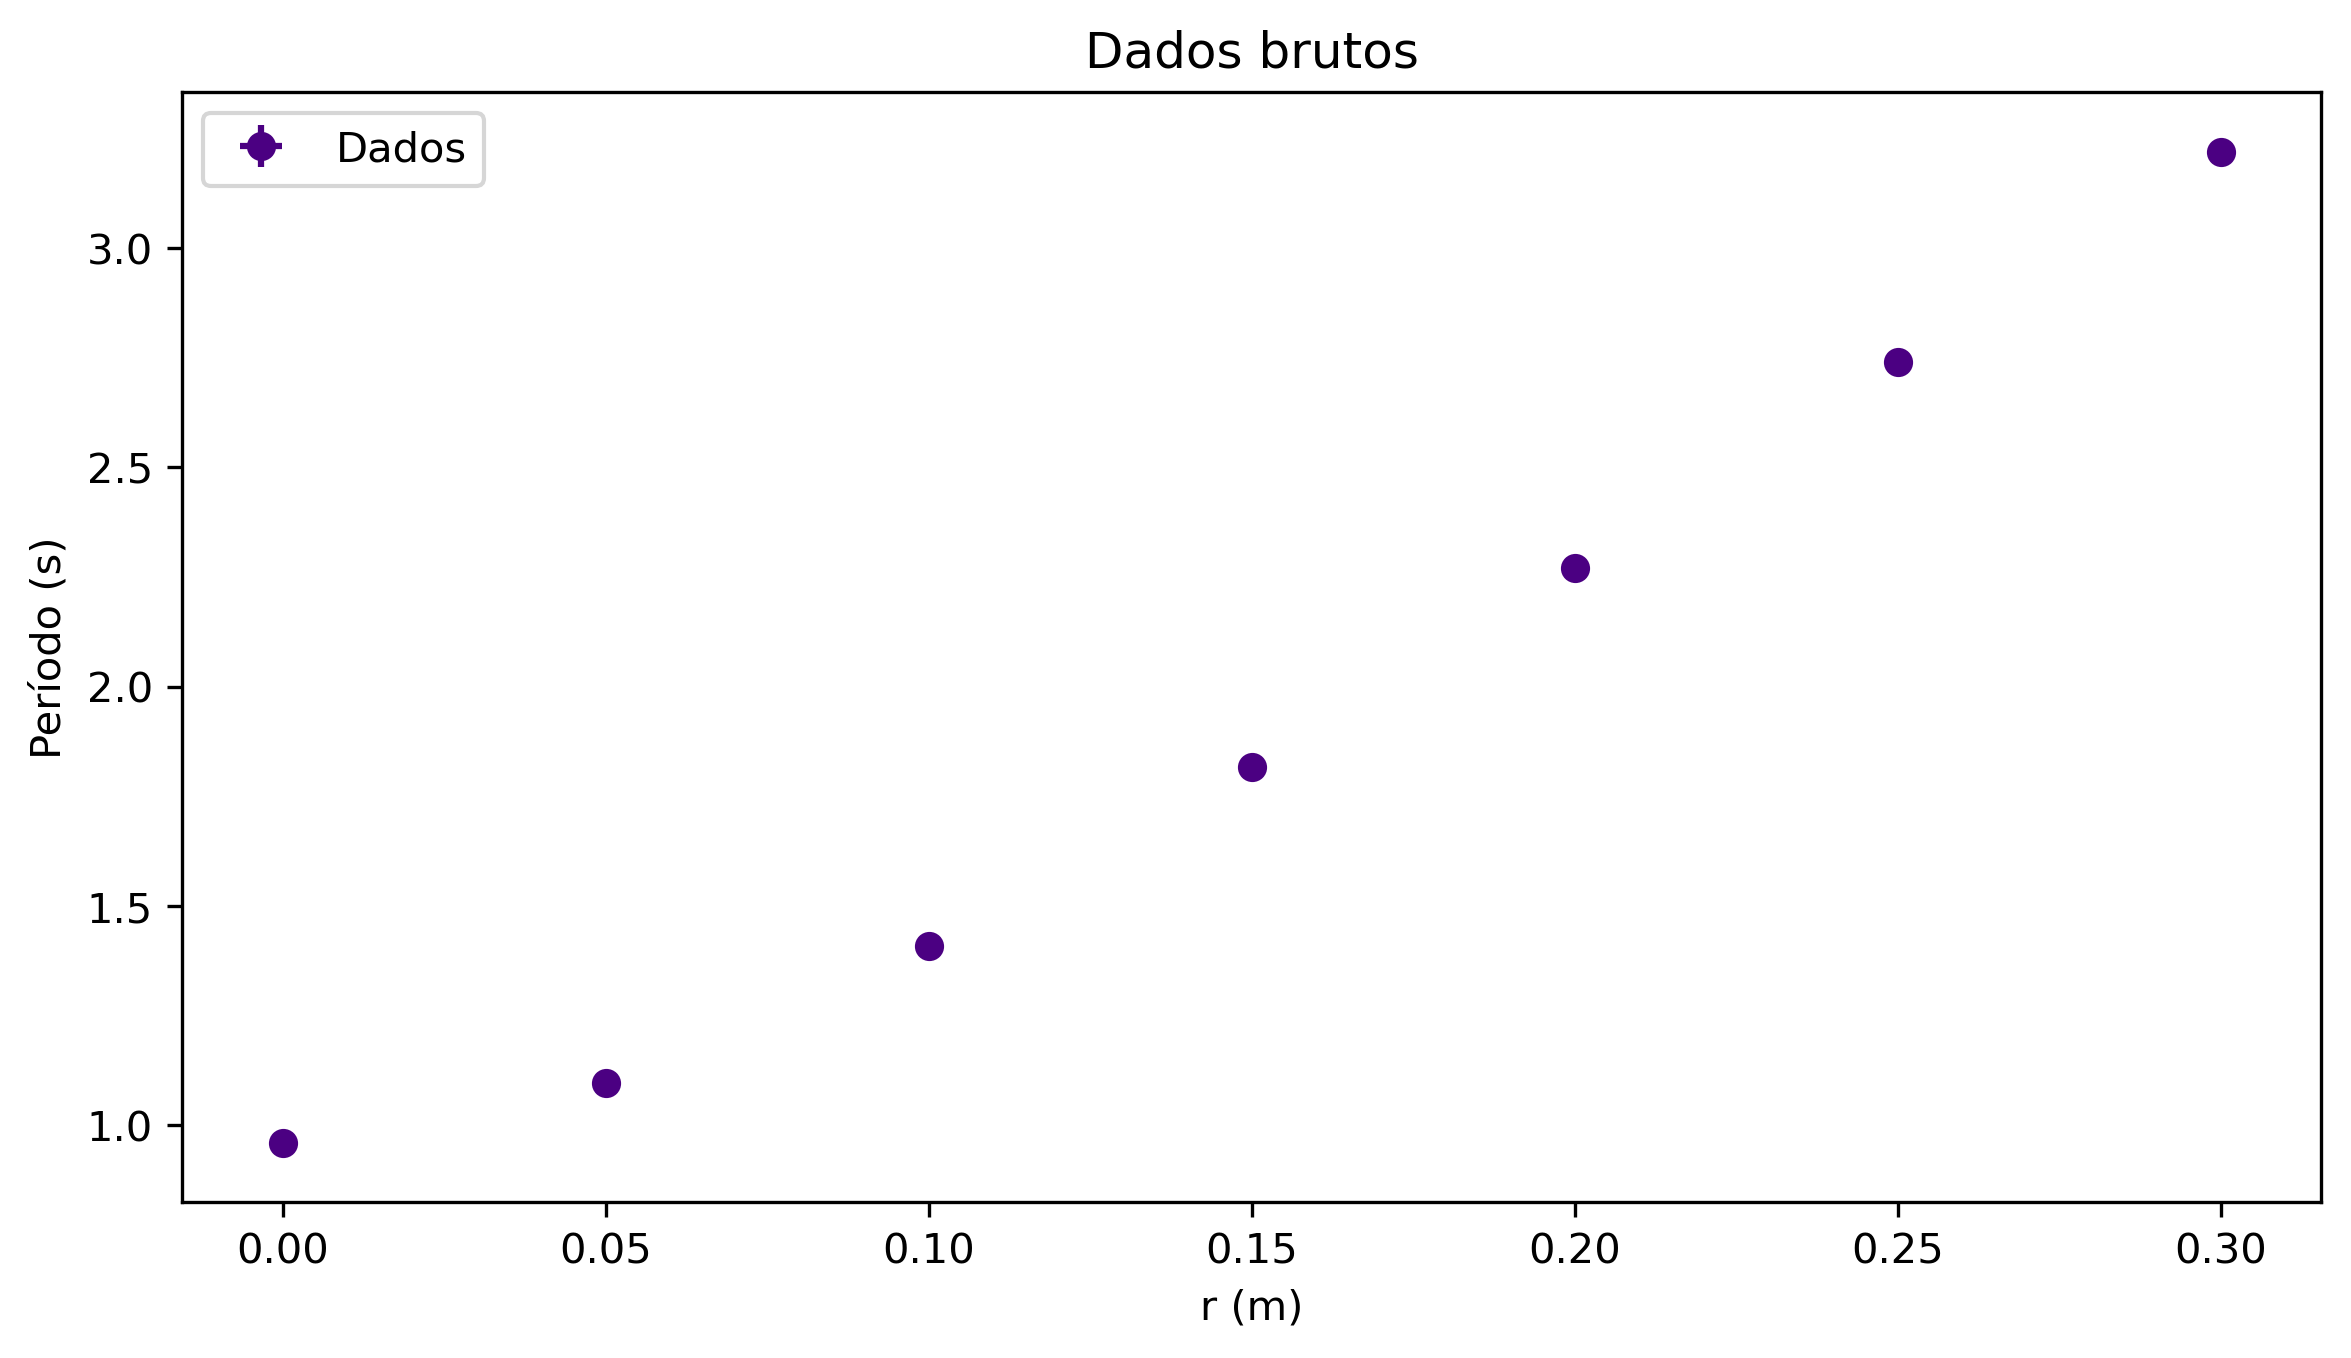

In [7]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.errorbar(dist,t_mean,inc_t_mean,np.full(len(dist),inc_dist), 'o', color = 'indigo', label = 'Dados')
plt.xlabel('r (m)')
plt.ylabel(r'Período (s)')
plt.title('Dados brutos')
plt.legend()
#plt.savefig('TxDL_brutos.pdf', dpi =300)
plt.show()

## Linearização dos dados

Pelo gráfico dos dados brutos, nós vemos que $T$ e $r$ não são lineares. No entanto, nosso modelo teórico diz que $T^2$ e $r^2$ devem apresentar um comportamento linear. Portanto, vamos verificar isso fazendo um plot dessas grandezas. Lembrando que a incerteza de uma grandeza $x$ se propaga para $y = x^2$ da seguinte forma:

$$\sigma_{y} = \sqrt{\left(\sigma_x \frac{dy}{dx}\right)^2} = \bigg|\sigma_x \frac{d}{dx}x^2\bigg| = 2\sigma_x|x|$$



In [8]:
#Calculando o período ao quadrado e sua incerteza

t_square = np.power(t_mean,2)
inc_t_square = 2*np.multiply(t_mean, inc_t_mean)
#Arredondando a incerteza
inc_t_square = [float('{:g}'.format(float('{:.1g}'.format(i)))) for i in inc_t_square]
#Arredondando t_square segundo a incerteza
for i,k in enumerate(inc_t_square):
    casas = str(k)[::-1].find('.')
    t_square[i] = np.round(t_square[i],casas)

print(t_square)
print(inc_t_square)

[10.4   7.5   5.15  3.3   1.99  1.2   0.92]
[0.1, 0.1, 0.09, 0.03, 0.06, 0.02, 0.04]


In [9]:
#Calculando a distância ao quadrado e sua incerteza:

r_square = np.power(dist,2)
inc_r_square = 2*inc_dist*np.array(dist)

#Arredondando a incerteza:
inc_r_square = np.array([float('{:g}'.format(float('{:.1g}'.format(i)))) for i in inc_r_square])


print(r_square)
print(inc_r_square)

[0.09   0.0625 0.04   0.0225 0.01   0.0025 0.    ]
[3.e-04 3.e-04 2.e-04 1.e-04 1.e-04 5.e-05 0.e+00]


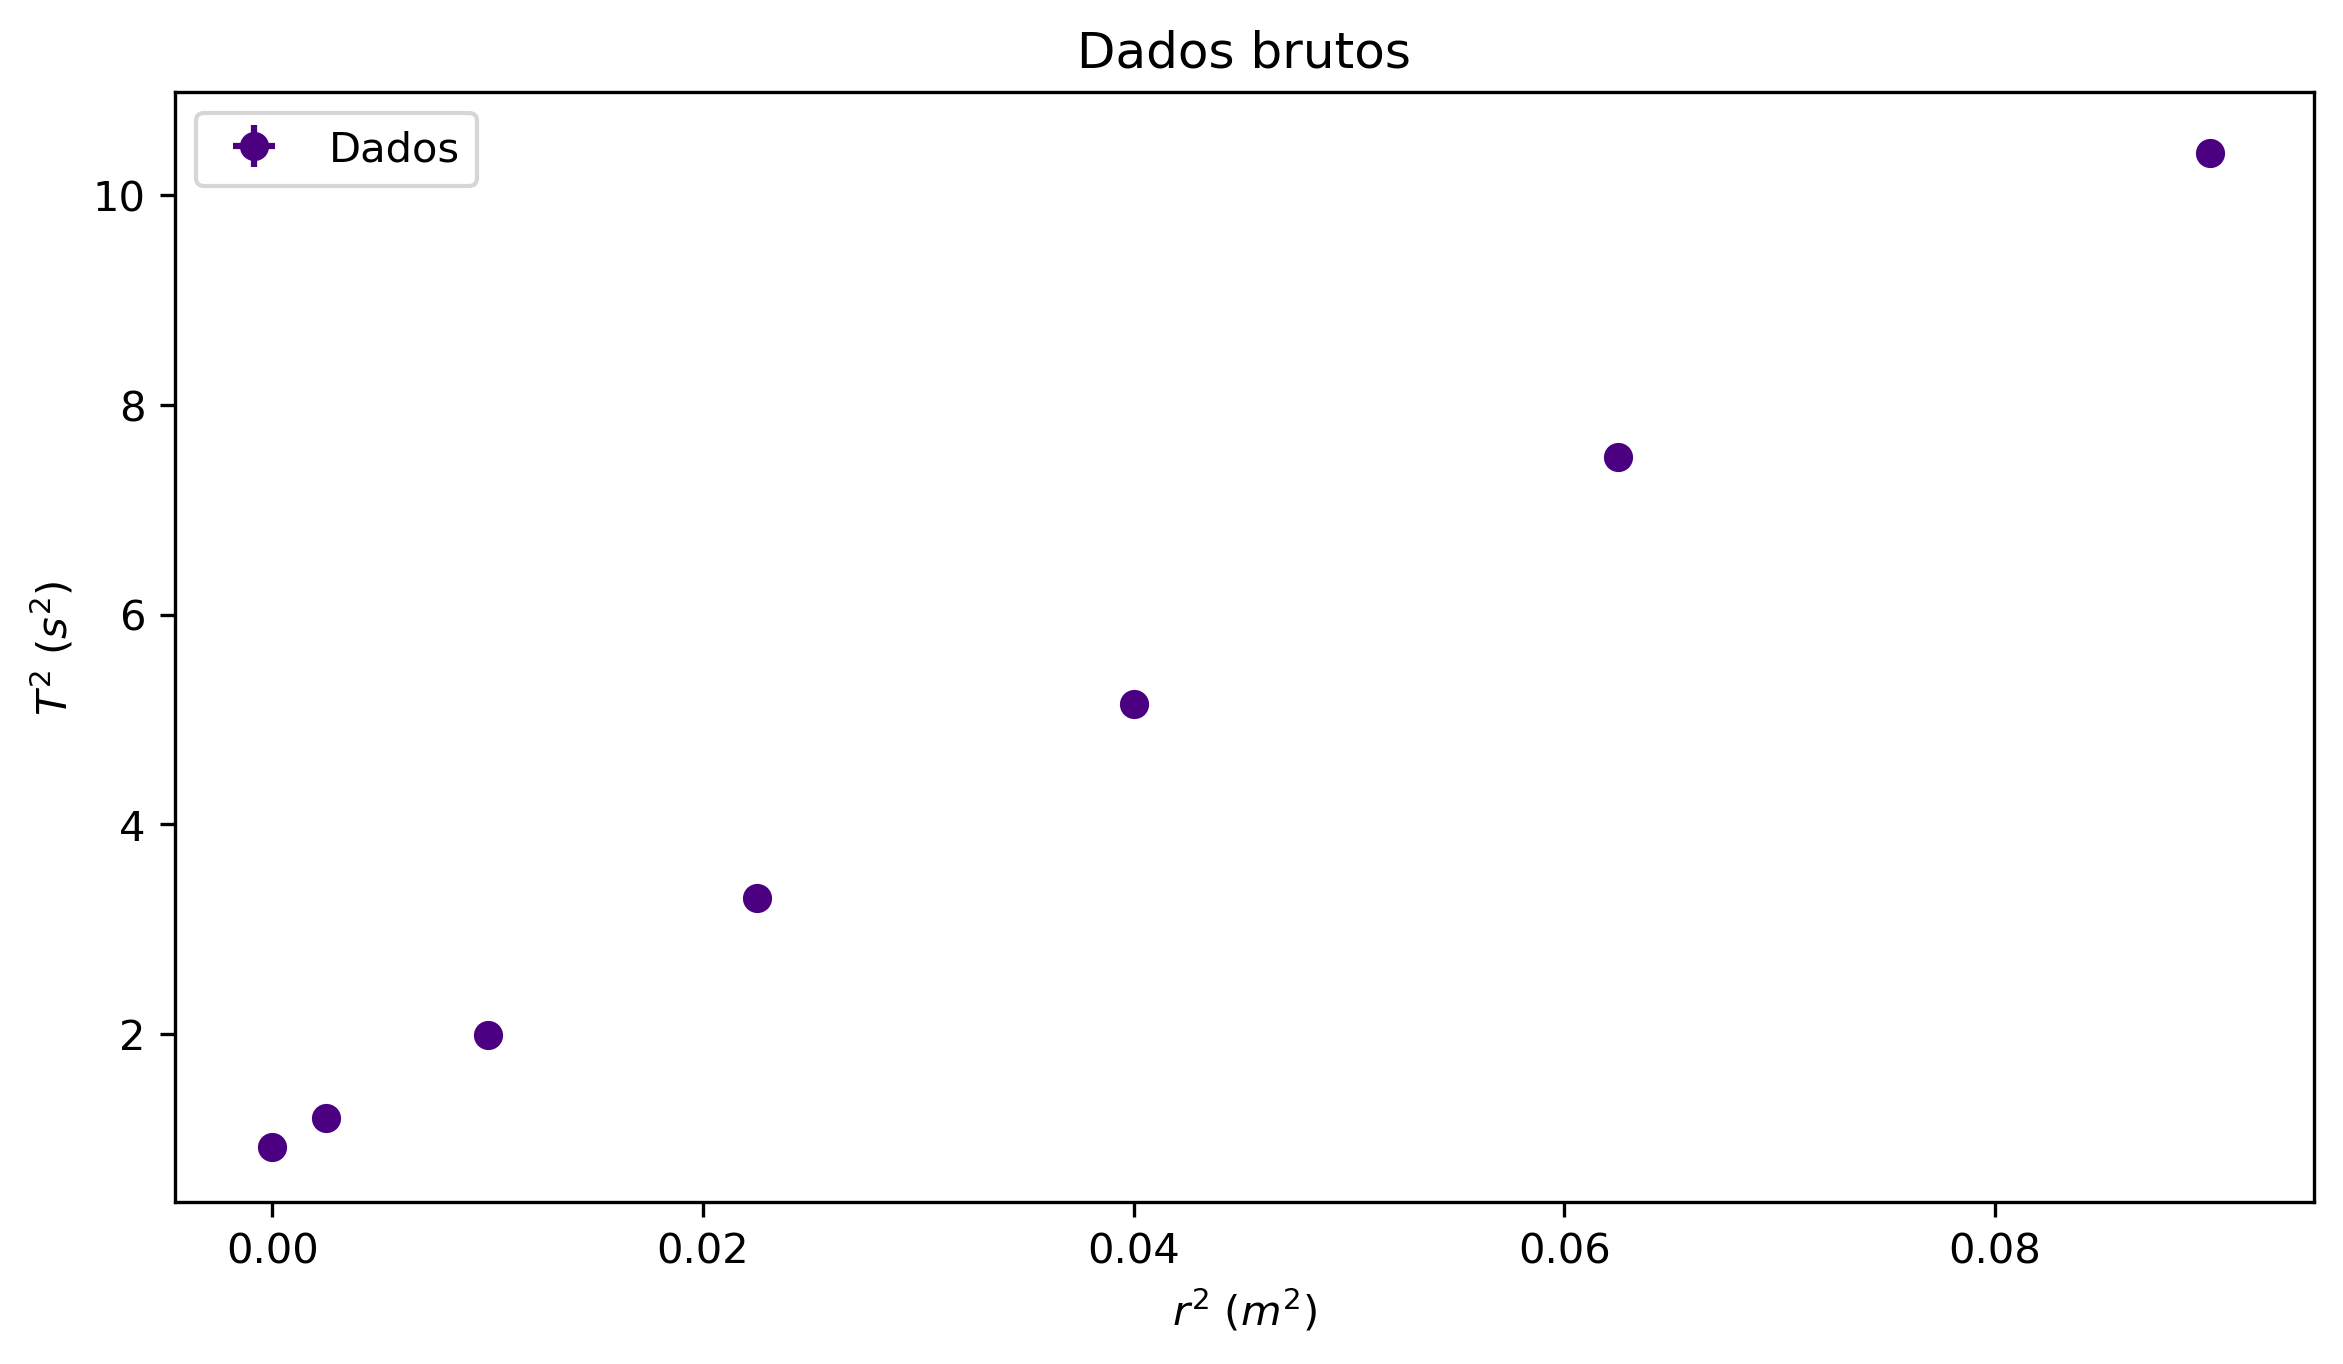

In [10]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.errorbar(r_square,t_square,inc_t_square,inc_r_square, 'o', color = 'indigo', label = 'Dados')
plt.xlabel(r'$r^2$ ($m^2$)')
plt.ylabel(r'$T^2$ ($s^2$)')
plt.title('Dados brutos')
plt.legend()
#plt.savefig('TxDL_brutos.pdf', dpi =300)
plt.show()

Aqui vemos que realmente temos um compotamento linear entre $T^2$ e $r^2$. Portanto, queremos ajustar uma reta:

$$T^2 = a_1 r^2 + b_1$$

## Transferência de incerteza

Nosso modelo teórico nos diz que:

$$T^2 =  4\pi^2 \frac{(m_1 + m_2)r^2}{D} + T_0^2$$

Como somente $r^2$ varia, então a transferência de incerteza é dada por:

$$\sigma'_{T^2} = \sqrt{\sigma_{T^2} + \left(\sigma_{r^2}\frac{dT^2}{dr^2}\right)^2}$$

Aqui $\frac{dT^2}{dr^2}$ pode ser aproximado como o coeficiente angular da reta ajustada sobre os dados brutos.

In [11]:
#Realizando o fit sobre os dados brutos:

fit = np.polyfit(r_square, t_square,1)

#Calculando a transferência de incerteza:
inc_t_square_transf = np.sqrt(np.power(inc_t_square,2) + np.power(inc_r_square*fit[0],2))

#Considerando apenas um algarismo significativo na incerteza:
inc_t_square_transf = np.array([float('{:g}'.format(float('{:.1g}'.format(i)))) for i in inc_t_square_transf])
print(inc_t_square_transf)

[0.1  0.1  0.09 0.03 0.06 0.02 0.04]


## Calculando o ajuste através do método dos mínimos quadrados:

In [12]:
fitpars, cov_pars = np.polyfit(r_square,t_square,1,w=np.power(inc_t_square_transf,-1),cov='True')
poly1d_fn = np.poly1d(fitpars) 
#print(fitpars, cov_pars)

#Coeficientes da reta ajustada:
coef_angular1 = fitpars[0]
coef_linear1 = fitpars[1]
sigma_angular1 = np.sqrt(cov_pars[0][0])
sigma_linear1 = np.sqrt(cov_pars[1][1])


#Considerando apenas um algarismo significativo na incerteza:
sigma_angular = float('{:g}'.format(float('{:.1g}'.format(sigma_angular1))))
sigma_linear = float('{:g}'.format(float('{:.1g}'.format(sigma_linear1))))

                     
print('Coeficiente angular: %.0f +- %.0f (s^2/m^2)' % (coef_angular1 ,sigma_angular1))
print('Coeficiente linear: %.2f +- %.2f (s^2)' %(coef_linear1,sigma_linear1))

Coeficiente angular: 105 +- 0 (s^2/m^2)
Coeficiente linear: 0.93 +- 0.00 (s^2)


## Gráfico do ajuste

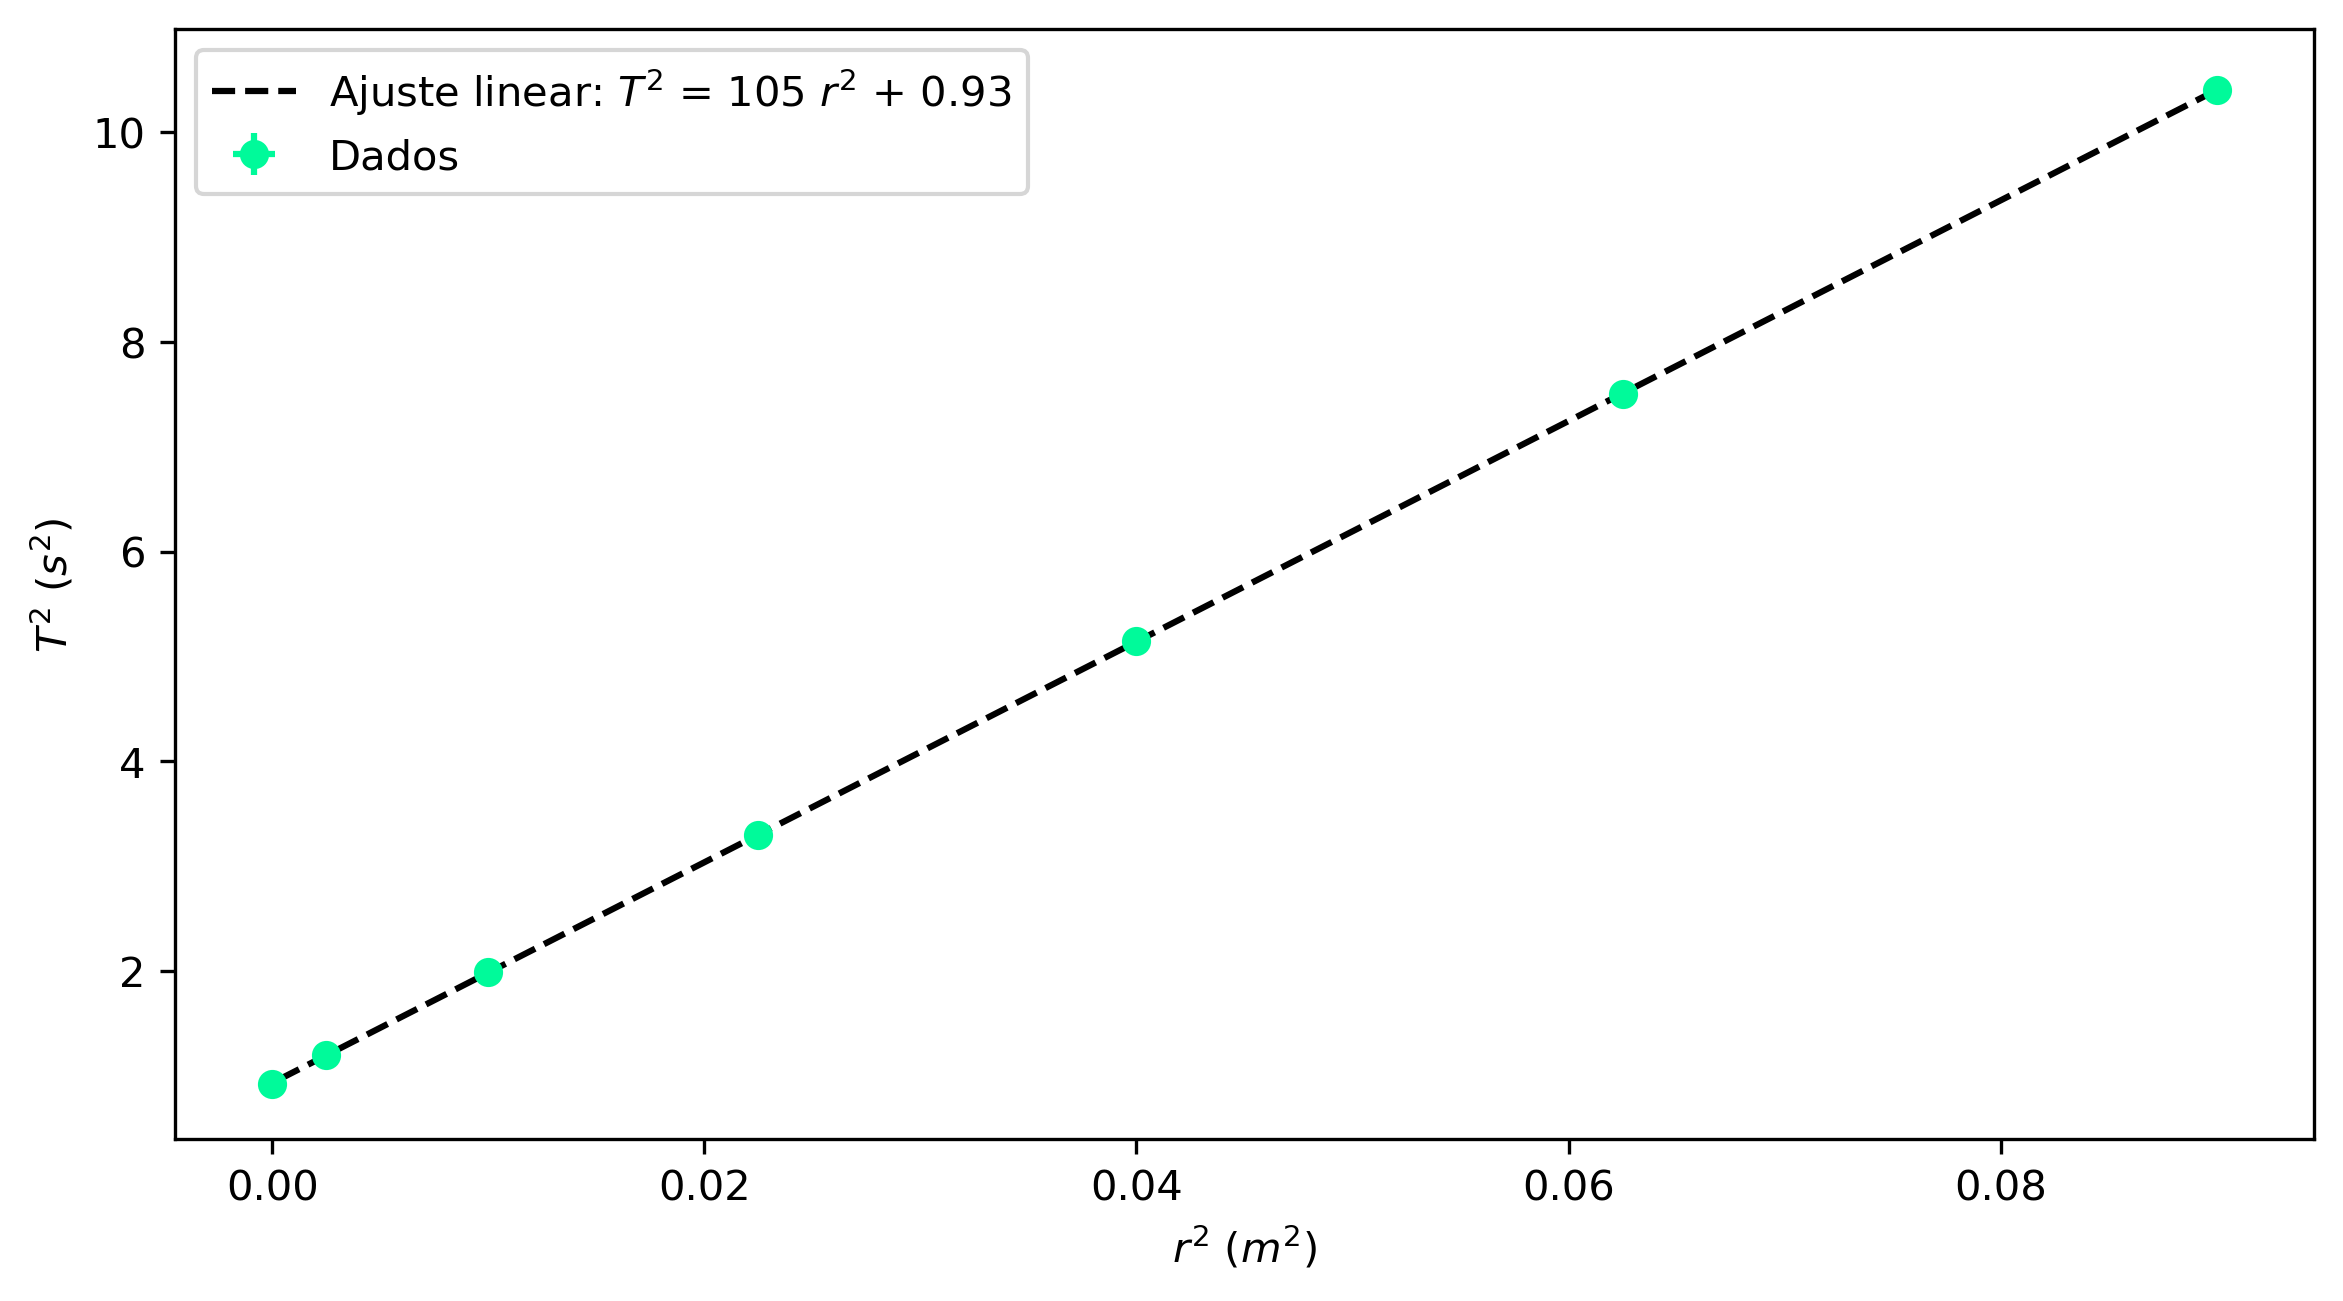

In [13]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.errorbar(r_square,t_square,inc_t_square_transf,0, 'o', color = 'Mediumspringgreen', label = 'Dados')
plt.plot(r_square,r_square*coef_angular1 + coef_linear1, color ='black', ls = '--', label = r'Ajuste linear: $T^2$ = %.0f $r^2$ + %.2f' % (coef_angular1,abs(coef_linear1)))
plt.xlabel(r'$r^2$ ($m^2$)')
plt.ylabel(r'$T^2$ ($s^2$)')
plt.legend()
#plt.savefig('TxD_ajuste.pdf', dpi =300)
plt.show()

## Interpretando os coeficientes

Nosso modelo teórico nos diz que:

$$T^2 =  4\pi^2 \frac{(m_1 + m_2)r^2}{D} + T_0^2$$

Se compararmos com o nosso ajuste $T^2 = a_1 r^2 + b_1$, veremos que:

$$a_1 = 4\pi^2 \frac{(m_1 + m_2)}{D}$$

$$b_1 = T_0^2$$

Como nós estamos interessados no torque restaurador $D$, vamos isolá-lo na primeira equação:

$$D = 4\pi^2 \frac{(m_1 + m_2)}{a_1}$$

Substituindo $m_1 = 0.23538$ kg, $m_2 = 0.23588$ kg e $a_1 = 420$ s^2/m^2:


$$D = 4\pi^2 \frac{(0.23538 + 235.88)}{420}$$


In [14]:
d = np.power(2*np.pi,2)*(m_1+m_2)/420
print('D = ', d, 'Nm')
print('%.5f' % d)

D =  0.044296664476736865 Nm
0.04430



A incerteza de $D$ pode ser obtida através da propagação das incertezas de $m_1$, $m_2$ e $a_1$:

$$\sigma_D = \sqrt{\left(\frac{\partial D}{\partial m_1}\right)^2\sigma_{m_1}^2 + \left(\frac{\partial D}{\partial m_2}\right)^2\sigma_{m_2}^2 + \left(\frac{\partial D}{\partial a_1}\right)^2\sigma_{a_1}^2}$$

Substituindo a expressão de D:

$$\sigma_D = \sqrt{\left(\frac{\partial D}{\partial m_1}\right)^2\sigma_{m_1}^2 + \left(\frac{\partial D}{\partial m_2}\right)^2\sigma_{m_2}^2 + \left(\frac{\partial D}{\partial a_1}\right)^2\sigma_{a_1}^2}$$

$$\sigma_D = 2\pi\sqrt{\left(\frac{\partial \frac{(m_1 + m_2)}{a_1}}{\partial m_1}\right)^2\sigma_{m_1}^2 + \left(\frac{\partial \frac{(m_1 + m_2)}{a_1}}{\partial m_2}\right)^2\sigma_{m_2}^2 + \left(\frac{\partial \frac{(m_1 + m_2)}{a_1}}{\partial a_1}\right)^2\sigma_{a_1}^2}$$

Como as incertezas das massas são as mesmas:

$$\sigma_D = 4\pi\sqrt{2\left(\frac{1}{a_1}\right)^2\sigma_{m}^2 + \left( \frac{(m_1 + m_2)}{a_1^2}\right)^2\sigma_{a_1}^2}$$

Substituindo que $m_1 = 0.23538$ kg, $m_2 = 0.23588$ kg, $a_1 = 420$ s^2/m^2, $\sigma_m = 10^{-5}$ kg e $\sigma_{a_1}=1$ s^2/m^2:

$$\sigma_D = 2\pi\sqrt{2\left(\frac{1}{420}\right)^2 (10^{-5})^2 + \left( \frac{(0.23538 + 0.23588)}{(420)^2}\right)^2(1)^2}$$

In [15]:
sigma_d = 2*np.pi*np.sqrt(2*np.power(1e-5/420,2) + np.power((0.23538 + 0.23588)/(420**2),2))
sigma_d = float('{:g}'.format(float('{:.1g}'.format(sigma_d))))
print(sigma_d)
print('%.5f' % sigma_d)


2e-05
0.00002


Assim vemos que:

$$D = (4.430 \pm 0.002 ) \ (10^{-2} Nm)$$

# Parte 2